In [24]:
import pandas as pd

file_url = 'https://raw.githubusercontent.com/ajayt0m/Forecasting_Crop_Prices_Maharashtra/main/onion_daily.csv'

onion_df = pd.read_csv(file_url, parse_dates=["date_arrival"])

In [25]:
with pd.option_context("display.max_columns", None, "display.max_rows", None):
    display(onion_df.head(6))

,state_name,district_name,market_center_name,Variety,group_name,Arrival,MIN,MAX,MODAL,date_arrival
0,Maharashtra,Ahmednagar,Ahmednagar,Other,Vegetables,5796.0,250,2600,1850.0,2023-09-30
1,Maharashtra,Ahmednagar,Ahmednagar,Other,Vegetables,6164.0,300,2600,1900.0,2023-09-28
2,Maharashtra,Ahmednagar,Ahmednagar,Other,Vegetables,5111.0,300,2800,2100.0,2023-09-25
3,Maharashtra,Ahmednagar,Ahmednagar,Other,Vegetables,3839.0,300,2600,1800.0,2023-09-23
4,Maharashtra,Ahmednagar,Ahmednagar,Other,Vegetables,5264.0,250,2600,1750.0,2023-09-21
5,Maharashtra,Ahmednagar,Ahmednagar,Other,Vegetables,5357.0,250,2600,1750.0,2023-09-18


In [26]:
onion_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40239 entries, 0 to 40238
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   state_name          40239 non-null  object        
 1   district_name       40239 non-null  object        
 2   market_center_name  40239 non-null  object        
 3   Variety             40239 non-null  object        
 4   group_name          40239 non-null  object        
 5   Arrival             40239 non-null  float64       
 6   MIN                 40239 non-null  int64         
 7   MAX                 40239 non-null  int64         
 8   MODAL               40239 non-null  float64       
 9   date_arrival        40239 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int64(2), object(5)
memory usage: 3.1+ MB


In [27]:
with pd.option_context("display.max_columns", None, "display.max_rows", None):
    display(onion_df['date_arrival'].value_counts())

2023-03-23    81
2022-12-29    78
2021-12-16    75
2023-04-11    69
2021-12-14    69
2021-12-23    69
2022-12-19    68
2022-12-13    68
2023-08-01    68
2023-03-28    68
2023-03-16    67
2023-03-20    67
2023-04-10    67
2023-03-31    67
2021-12-15    67
2023-07-26    66
2022-12-20    66
2023-03-14    66
2023-08-03    66
2023-03-27    65
2023-03-21    65
2021-12-02    65
2023-04-13    65
2023-08-02    64
2021-12-08    64
2023-07-20    64
2023-03-24    64
2022-12-28    64
2022-12-15    64
2023-07-12    64
2023-07-13    64
2023-08-08    64
2022-12-12    64
2023-04-12    64
2022-03-24    63
2022-04-07    63
2022-03-14    63
2021-12-30    63
2023-07-11    63
2023-07-06    63
2023-08-10    63
2021-12-09    62
2021-11-30    62
2021-12-07    62
2023-04-17    62
2021-12-03    61
2023-07-25    61
2021-05-04    61
2022-12-30    61
2022-12-08    61
2021-12-17    61
2021-12-22    61
2021-12-20    61
2023-07-05    60
2022-10-13    60
2021-05-06    60
2021-11-25    60
2021-11-29    60
2021-03-08    

In [28]:
with pd.option_context("display.max_columns", None, "display.max_rows", None):
    display(onion_df.head())

,state_name,district_name,market_center_name,Variety,group_name,Arrival,MIN,MAX,MODAL,date_arrival
0,Maharashtra,Ahmednagar,Ahmednagar,Other,Vegetables,5796.0,250,2600,1850.0,2023-09-30
1,Maharashtra,Ahmednagar,Ahmednagar,Other,Vegetables,6164.0,300,2600,1900.0,2023-09-28
2,Maharashtra,Ahmednagar,Ahmednagar,Other,Vegetables,5111.0,300,2800,2100.0,2023-09-25
3,Maharashtra,Ahmednagar,Ahmednagar,Other,Vegetables,3839.0,300,2600,1800.0,2023-09-23
4,Maharashtra,Ahmednagar,Ahmednagar,Other,Vegetables,5264.0,250,2600,1750.0,2023-09-21


In [56]:
onion_grouped = onion_df.groupby('date_arrival').agg({'MIN': 'mean', 'MAX': 'mean', 'MODAL': 'mean', 'Arrival': 'sum'}).reset_index()

In [57]:
import pandas as pd

start_date = '2021-01-01'
end_date = '2023-10-01'
date_range = pd.date_range(start=start_date, end=end_date, freq='D')

# This will fill in missing dates with NaN values in other columns.
onion_grouped = onion_grouped.merge(pd.DataFrame({'date_arrival': date_range}), on='date_arrival', how='right')

In [58]:
with pd.option_context("display.max_columns", None, "display.max_rows", None):
    display(onion_grouped.head(10))

,date_arrival,MIN,MAX,MODAL,Arrival
0,2021-01-01,865.145833,2706.875000,2060.604167,11575.0
1,2021-01-02,1105.066667,2720.155556,2181.844444,15560.0
2,2021-01-03,1129.411765,2741.470588,2141.176471,3954.0
3,2021-01-04,967.306122,2754.163265,2167.551020,21441.0
4,2021-01-05,1188.836735,2793.714286,2275.469388,21526.0
5,2021-01-06,1335.294118,2698.000000,2242.647059,7103.0
6,2021-01-07,NaN,NaN,NaN,NaN
7,2021-01-08,NaN,NaN,NaN,NaN
8,2021-01-09,1160.000000,3223.000000,2832.400000,3389.0
9,2021-01-10,633.333333,3366.666667,2375.000000,394.0


In [59]:
with pd.option_context("display.max_columns", None, "display.max_rows", None):
    display(onion_grouped['date_arrival'].value_counts())

2021-01-01    1
2022-11-06    1
2022-10-24    1
2022-10-25    1
2022-10-26    1
2022-10-27    1
2022-10-28    1
2022-10-29    1
2022-10-30    1
2022-10-31    1
2022-11-01    1
2022-11-02    1
2022-11-03    1
2022-11-04    1
2022-11-05    1
2022-11-07    1
2022-11-22    1
2022-11-08    1
2022-11-09    1
2022-11-10    1
2022-11-11    1
2022-11-12    1
2022-11-13    1
2022-11-14    1
2022-11-15    1
2022-11-16    1
2022-11-17    1
2022-11-18    1
2022-11-19    1
2022-11-20    1
2022-10-23    1
2022-10-22    1
2022-10-21    1
2022-10-20    1
2022-09-23    1
2022-09-24    1
2022-09-25    1
2022-09-26    1
2022-09-27    1
2022-09-28    1
2022-09-29    1
2022-09-30    1
2022-10-01    1
2022-10-02    1
2022-10-03    1
2022-10-04    1
2022-10-05    1
2022-10-06    1
2022-10-07    1
2022-10-08    1
2022-10-09    1
2022-10-10    1
2022-10-11    1
2022-10-12    1
2022-10-13    1
2022-10-14    1
2022-10-15    1
2022-10-16    1
2022-10-17    1
2022-10-18    1
2022-10-19    1
2022-11-21    1
2022-11-

In [60]:
#Set index as date
onion_grouped.index  = pd.to_datetime(onion_grouped['date_arrival'], format = '%Y-%m-%d')

In [61]:
onion_grouped.head(10)

,date_arrival,MIN,MAX,MODAL,Arrival
date_arrival,,,,,
2021-01-01,2021-01-01,865.145833,2706.875000,2060.604167,11575.0
2021-01-02,2021-01-02,1105.066667,2720.155556,2181.844444,15560.0
2021-01-03,2021-01-03,1129.411765,2741.470588,2141.176471,3954.0
2021-01-04,2021-01-04,967.306122,2754.163265,2167.551020,21441.0
2021-01-05,2021-01-05,1188.836735,2793.714286,2275.469388,21526.0
2021-01-06,2021-01-06,1335.294118,2698.000000,2242.647059,7103.0
2021-01-07,2021-01-07,NaN,NaN,NaN,NaN
2021-01-08,2021-01-08,NaN,NaN,NaN,NaN
2021-01-09,2021-01-09,1160.000000,3223.000000,2832.400000,3389.0


In [62]:
onion_grouped[['MIN', 'MAX', 'Arrival', 'MODAL']] = onion_grouped[['MIN', 'MAX', 'Arrival', 'MODAL']].fillna(method='ffill')

In [63]:
onion_grouped.head(10)

,date_arrival,MIN,MAX,MODAL,Arrival
date_arrival,,,,,
2021-01-01,2021-01-01,865.145833,2706.875000,2060.604167,11575.0
2021-01-02,2021-01-02,1105.066667,2720.155556,2181.844444,15560.0
2021-01-03,2021-01-03,1129.411765,2741.470588,2141.176471,3954.0
2021-01-04,2021-01-04,967.306122,2754.163265,2167.551020,21441.0
2021-01-05,2021-01-05,1188.836735,2793.714286,2275.469388,21526.0
2021-01-06,2021-01-06,1335.294118,2698.000000,2242.647059,7103.0
2021-01-07,2021-01-07,1335.294118,2698.000000,2242.647059,7103.0
2021-01-08,2021-01-08,1335.294118,2698.000000,2242.647059,7103.0
2021-01-09,2021-01-09,1160.000000,3223.000000,2832.400000,3389.0


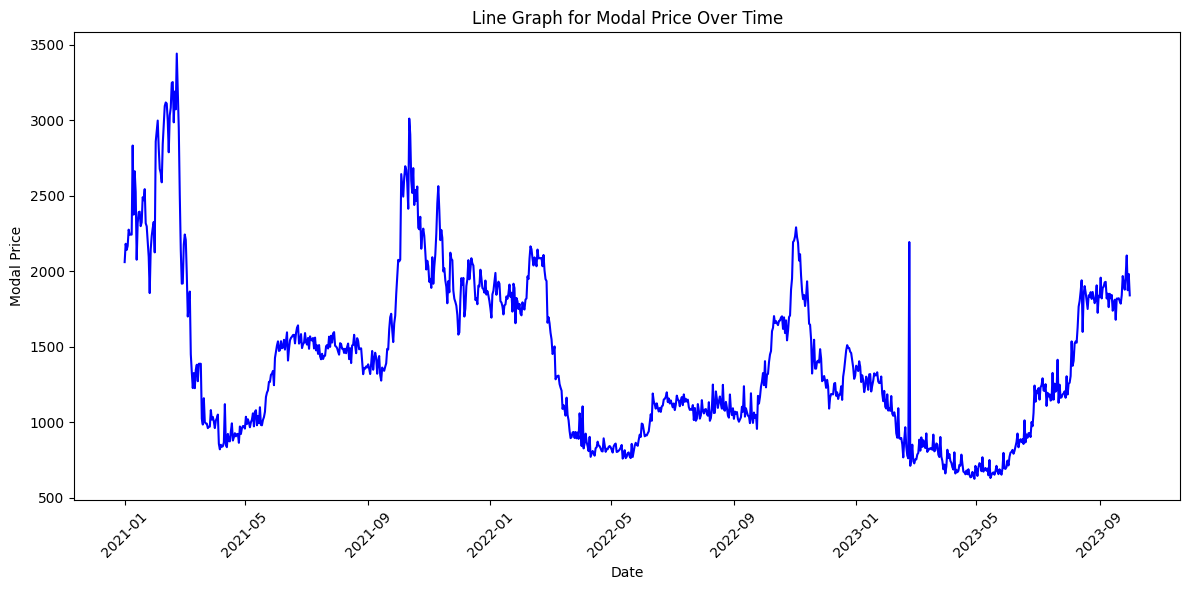

In [41]:
import matplotlib.pyplot as plt

# Extract data for plotting
date_arrival = onion_grouped.index  # Use the DataFrame index as the x-axis
modal_price = onion_grouped['MODAL']

# Create a figure and axis
plt.figure(figsize=(12, 6))

# Plot the 'MODAL' column as a line
plt.plot(date_arrival, modal_price, label='Modal Price', linestyle='-', color='blue')

# Customize the chart
plt.xlabel('Date')
plt.ylabel('Modal Price')
plt.title('Line Graph for Modal Price Over Time')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the chart
plt.tight_layout()
plt.show()

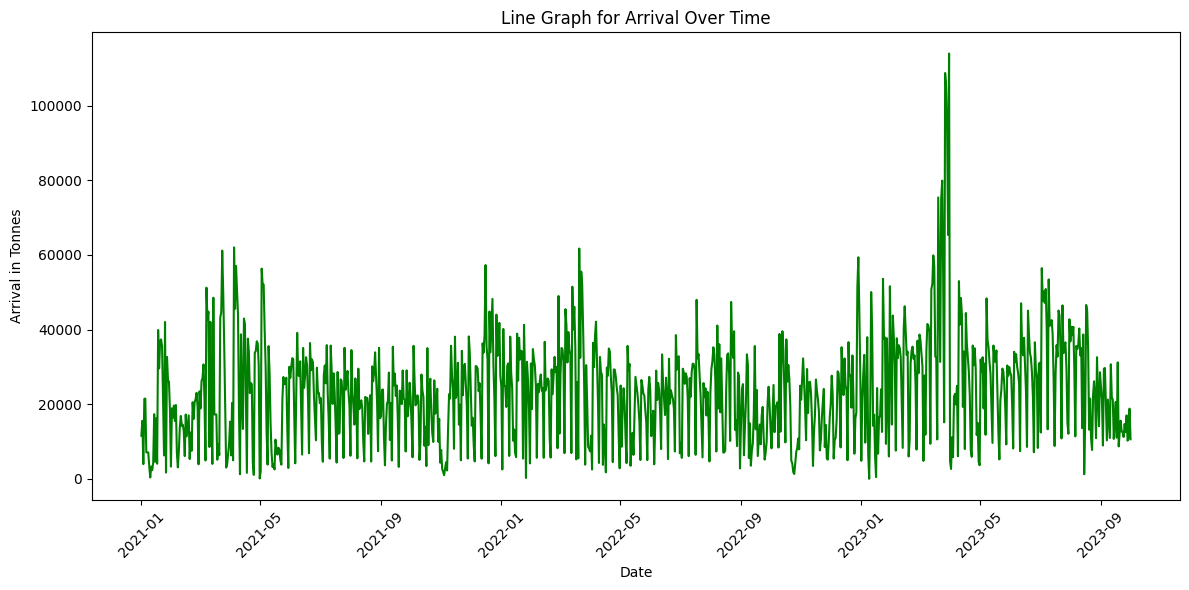

In [42]:
import matplotlib.pyplot as plt

# Extract data for plotting
date_arrival = onion_grouped.index  # Use the DataFrame index as the x-axis
arrival = onion_grouped['Arrival']

# Create a figure and axis
plt.figure(figsize=(12, 6))

# Plot the 'MODAL' column as a line
plt.plot(date_arrival, arrival, label='Arrival in Tonnes', linestyle='-', color='Green')

# Customize the chart
plt.xlabel('Date')
plt.ylabel('Arrival in Tonnes')
plt.title('Line Graph for Arrival Over Time')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the chart
plt.tight_layout()
plt.show()

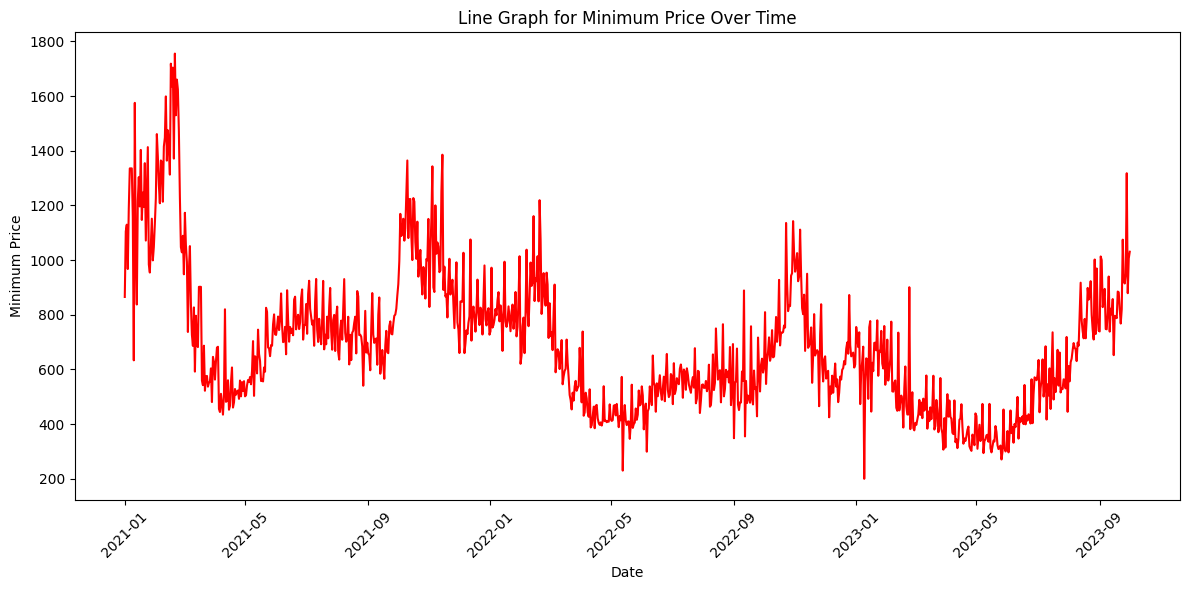

In [43]:
import matplotlib.pyplot as plt

# Extract data for plotting
date_arrival = onion_grouped.index  # Use the DataFrame index as the x-axis
min = onion_grouped['MIN']

# Create a figure and axis
plt.figure(figsize=(12, 6))

# Plot the 'MODAL' column as a line
plt.plot(date_arrival, min, label='Minimum Price', linestyle='-', color='Red')

# Customize the chart
plt.xlabel('Date')
plt.ylabel('Minimum Price')
plt.title('Line Graph for Minimum Price Over Time')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the chart
plt.tight_layout()
plt.show()

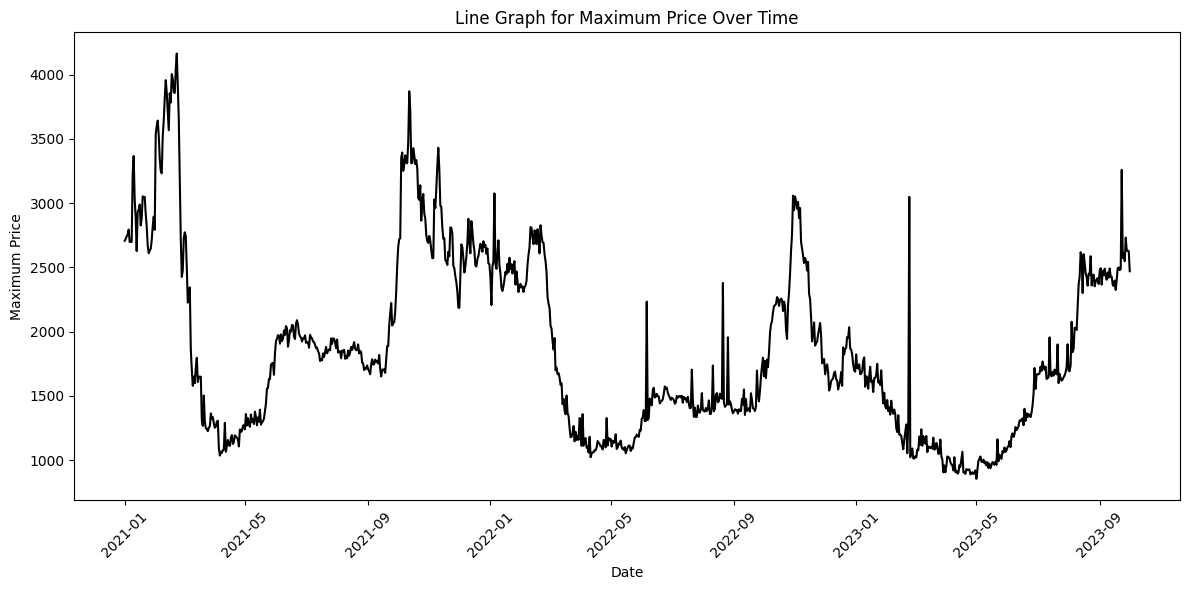

In [44]:
import matplotlib.pyplot as plt

# Extract data for plotting
date_arrival = onion_grouped.index  # Use the DataFrame index as the x-axis
max = onion_grouped['MAX']

# Create a figure and axis
plt.figure(figsize=(12, 6))

# Plot the 'MODAL' column as a line
plt.plot(date_arrival, max, label='Maximum Price', linestyle='-', color='black')

# Customize the chart
plt.xlabel('Date')
plt.ylabel('Maximum Price')
plt.title('Line Graph for Maximum Price Over Time')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the chart
plt.tight_layout()
plt.show()

# Scatter Plot to check the correlation and linearity

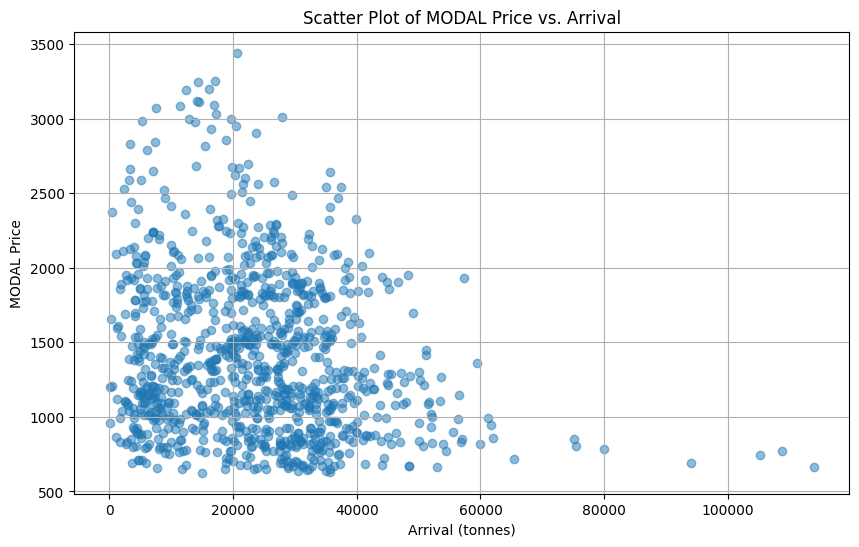

In [45]:
import matplotlib.pyplot as plt

arrival = onion_grouped['Arrival']
modal = onion_grouped['MODAL']

# Create a scatter plot
plt.figure(figsize=(10, 6))  # Set the figure size as needed
plt.scatter(arrival, modal, alpha=0.5)  # Alpha controls point transparency

# Customize the plot
plt.xlabel('Arrival (tonnes)')
plt.ylabel('MODAL Price')
plt.title('Scatter Plot of MODAL Price vs. Arrival')
plt.grid(True)  # Add a grid

# Show the plot
plt.show()


### Contrary to the obvious assumption that the Price of the onion is linearly dependent to Quanitity of Onions, the data shows a non-linear relationship.

# Decompose

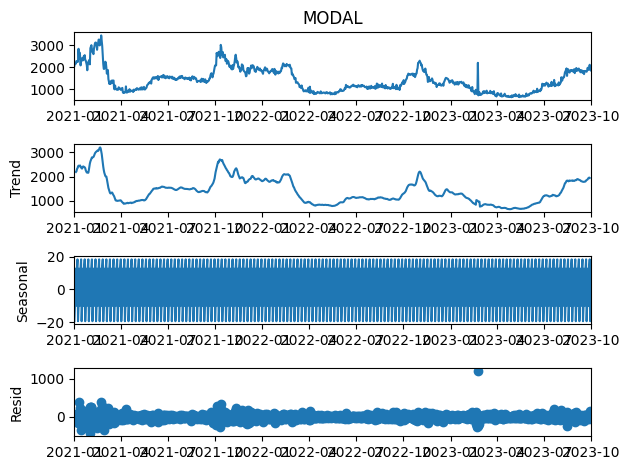

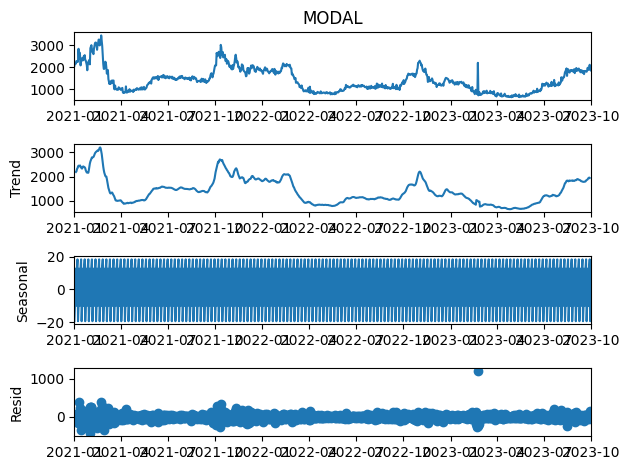

In [46]:
from statsmodels.tsa.seasonal import seasonal_decompose

results = seasonal_decompose(onion_grouped['MODAL'])
results.plot()

In [47]:
onion_grouped.shape

(1004, 5)

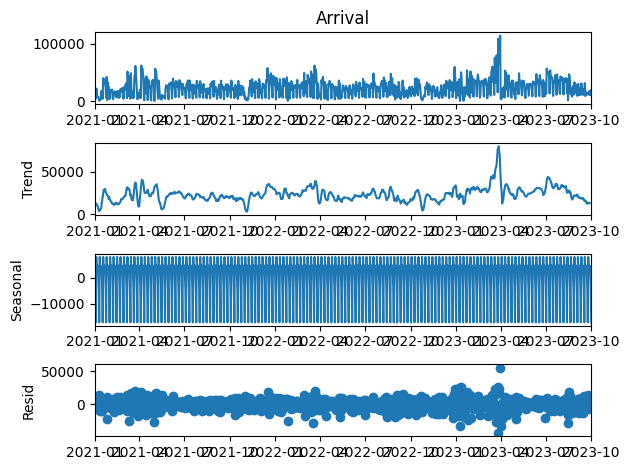

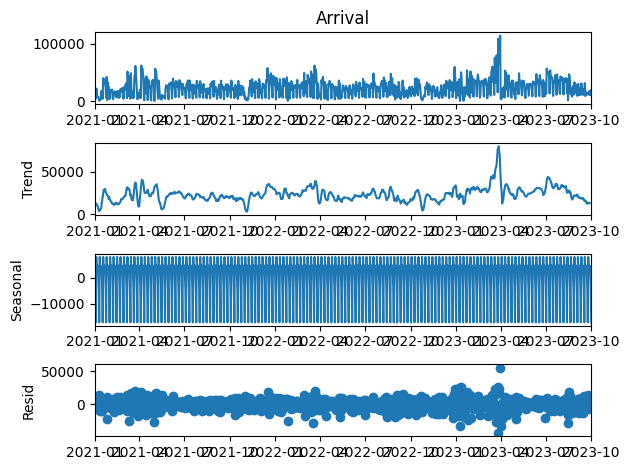

In [48]:
results = seasonal_decompose(onion_grouped['Arrival'])
results.plot()

In [49]:
onion_grouped.isna().sum()

date_arrival    0
MIN             0
MAX             0
MODAL           0
Arrival         0
dtype: int64

In [51]:
with pd.option_context("display.max_columns", None, "display.max_rows", None):
    display(onion_grouped.head(10))

,date_arrival,MIN,MAX,MODAL,Arrival
date_arrival,,,,,
2021-01-01,2021-01-01,865.145833,2706.875000,2060.604167,11575.0
2021-01-02,2021-01-02,1105.066667,2720.155556,2181.844444,15560.0
2021-01-03,2021-01-03,1129.411765,2741.470588,2141.176471,3954.0
2021-01-04,2021-01-04,967.306122,2754.163265,2167.551020,21441.0
2021-01-05,2021-01-05,1188.836735,2793.714286,2275.469388,21526.0
2021-01-06,2021-01-06,1335.294118,2698.000000,2242.647059,7103.0
2021-01-07,2021-01-07,1335.294118,2698.000000,2242.647059,7103.0
2021-01-08,2021-01-08,1335.294118,2698.000000,2242.647059,7103.0
2021-01-09,2021-01-09,1160.000000,3223.000000,2832.400000,3389.0


In [52]:
onion_grouped.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1004 entries, 2021-01-01 to 2023-10-01
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   date_arrival  1004 non-null   datetime64[ns]
 1   MIN           1004 non-null   float64       
 2   MAX           1004 non-null   float64       
 3   MODAL         1004 non-null   float64       
 4   Arrival       1004 non-null   float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 47.1 KB


In [64]:
onion_grouped

,date_arrival,MIN,MAX,MODAL,Arrival
date_arrival,,,,,
2021-01-01,2021-01-01,865.145833,2706.875000,2060.604167,11575.00
2021-01-02,2021-01-02,1105.066667,2720.155556,2181.844444,15560.00
2021-01-03,2021-01-03,1129.411765,2741.470588,2141.176471,3954.00
2021-01-04,2021-01-04,967.306122,2754.163265,2167.551020,21441.00
2021-01-05,2021-01-05,1188.836735,2793.714286,2275.469388,21526.00
...,...,...,...,...,...
2023-09-27,2023-09-27,948.090909,2731.454545,1978.393939,17023.00
2023-09-28,2023-09-28,1317.647059,2629.470588,2104.411765,10241.00
2023-09-29,2023-09-29,878.925926,2629.555556,1874.296296,10973.12


In [65]:
# Round the specified columns to three decimal places.
onion_grouped[['MIN', 'MAX', 'Arrival', 'MODAL']] = onion_grouped[['MIN', 'MAX', 'Arrival', 'MODAL']].round(2)

In [66]:
onion_grouped

,date_arrival,MIN,MAX,MODAL,Arrival
date_arrival,,,,,
2021-01-01,2021-01-01,865.15,2706.88,2060.60,11575.00
2021-01-02,2021-01-02,1105.07,2720.16,2181.84,15560.00
2021-01-03,2021-01-03,1129.41,2741.47,2141.18,3954.00
2021-01-04,2021-01-04,967.31,2754.16,2167.55,21441.00
2021-01-05,2021-01-05,1188.84,2793.71,2275.47,21526.00
...,...,...,...,...,...
2023-09-27,2023-09-27,948.09,2731.45,1978.39,17023.00
2023-09-28,2023-09-28,1317.65,2629.47,2104.41,10241.00
2023-09-29,2023-09-29,878.93,2629.56,1874.30,10973.12


In [63]:
#Export the cleaned csv file

file_url = 'd:/GitHub/Forecasting_Crop_Prices_Maharashtra/onion_daily_cleaned.csv'

onion_grouped.to_csv(file_url, index=False)

# Splitting

In [970]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(onion_grouped, test_size= 0.1, shuffle=False)

# Scaling

In [971]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [972]:
train_transformed = scaler.fit_transform(train)
test_transformed = scaler.fit_transform(test)

# Tensorflow

In [973]:
#%pip install tensorflow

In [974]:
#lookback
n_input = 15
n_features = 4

generatorTrain = TimeseriesGenerator(train_transformed, train_transformed, length=n_input, batch_size=1)

In [975]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

In [976]:
#define model
model = Sequential()
model.add(LSTM(136, activation='relu', input_shape=(n_input, n_features)))
model.add(Dense(4))
model.compile(optimizer='adam', loss='mse')

In [977]:
model.summary()

Model: "sequential_51"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_51 (LSTM)              (None, 136)               76704     
                                                                 
 dense_51 (Dense)            (None, 4)                 548       
                                                                 
Total params: 77252 (301.77 KB)
Trainable params: 77252 (301.77 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [978]:
#fit model
model.fit(generatorTrain, epochs=4)

Epoch 1/4
888/888 [==============================] - 8s 7ms/step - loss: 0.0088
Epoch 2/4
888/888 [==============================] - 5s 6ms/step - loss: 0.0062
Epoch 3/4
888/888 [==============================] - 5s 6ms/step - loss: 0.0059
Epoch 4/4
888/888 [==============================] - 6s 6ms/step - loss: 0.0056


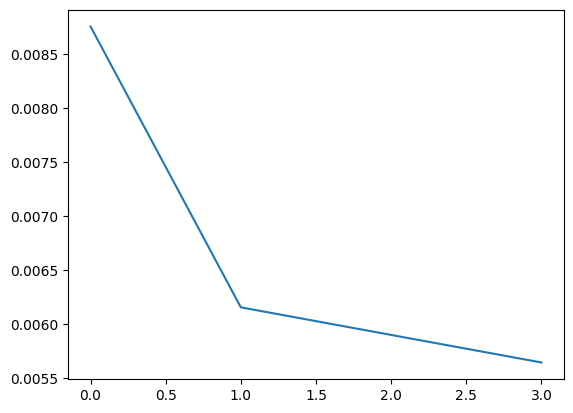

In [979]:
loss_per_epoch = model.history.history['loss']
plt.plot(range(len(loss_per_epoch)), loss_per_epoch)

# Prediction

In [980]:
last_train_batch = train_transformed[-n_input:]

In [981]:
last_train_batch = last_train_batch.reshape((1,n_input,n_features))

In [982]:
model.predict(last_train_batch)

1/1 [==============================] - 0s 219ms/step


array([[0.17409965, 0.12179495, 0.10842982, 0.21326217]], dtype=float32)

In [983]:
test_transformed[0]

array([0.0289923 , 0.00749883, 0.02183821, 0.4951099 ])

In [984]:
test_predictions = []

first_eval_batch = train_transformed[-n_input:]
current_batch = first_eval_batch.reshape((1, n_input, n_features))

for i in range(len(test)):
    
    # get the prediction value for the first batch
    current_pred = model.predict(current_batch)[0]
    
    # append the prediction into the array
    test_predictions.append(current_pred) 
    
    # use the prediction to update the batch and remove the first value
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

1/1 [==============================] - 0s 22ms/step


In [985]:
true_predictions = scaler.inverse_transform(test_predictions)

In [986]:
import pandas as pd

# Assuming 'true_predictions' is your array
test['Pred_Min'] = true_predictions[:, 0]
test['Pred_Max'] = true_predictions[:, 1]
test['Pred_Modal'] = true_predictions[:, 2]
test['Pred_Arrival'] = true_predictions[:, 3]

In [987]:
test

,MIN,MAX,MODAL,Arrival,Pred_Min,Pred_Max,Pred_Modal,Pred_Arrival
date_arrival,,,,,,,,
2023-06-23,428.901961,1349.960784,928.593725,28592.30,561.715995,1569.812336,1032.682816,13029.618364
2023-06-24,402.365854,1335.536585,902.342683,22136.25,560.645666,1563.147941,1031.327362,12311.241221
2023-06-25,564.040000,1369.040000,1001.440000,7143.00,560.290854,1559.217329,1031.089810,11831.648162
2023-06-26,403.500000,1424.892857,974.018214,36601.70,560.313713,1557.024183,1031.409723,11493.436259
2023-06-27,509.574074,1515.148148,1062.455926,29144.41,560.442408,1556.379027,1031.999787,11257.218463
...,...,...,...,...,...,...,...,...
2023-09-27,948.090909,2731.454545,1978.393939,17023.00,589.135221,1628.195674,1080.345922,10634.130495
2023-09-28,1317.647059,2629.470588,2104.411765,10241.00,589.137444,1628.203671,1080.349827,10634.138723
2023-09-29,878.925926,2629.555556,1874.296296,10973.12,589.139476,1628.211066,1080.353409,10634.148597


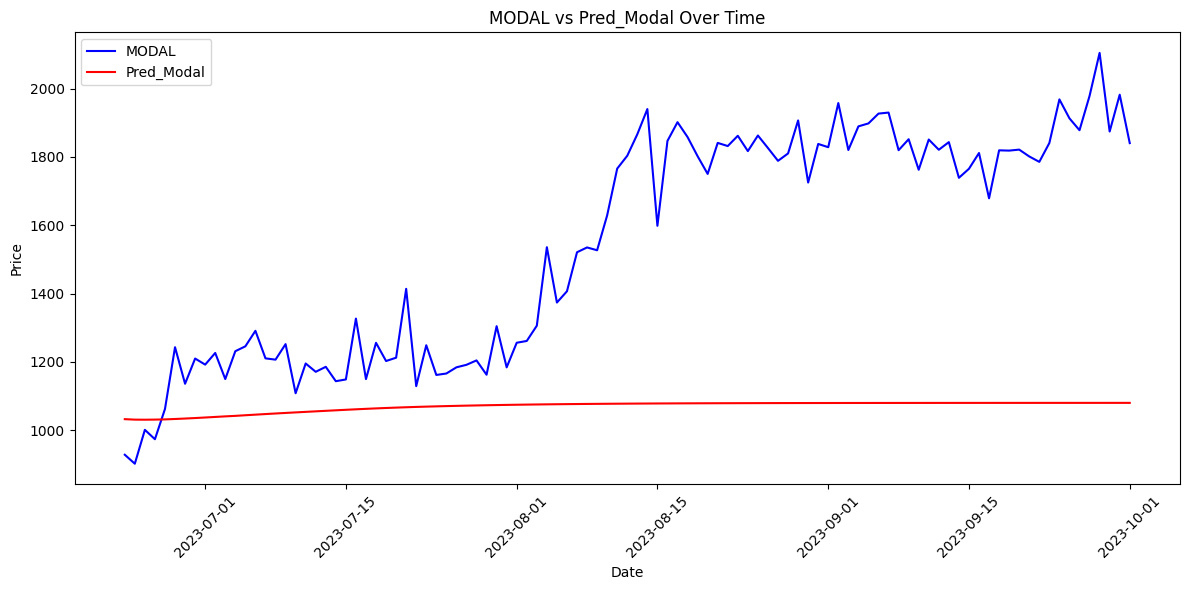

In [988]:
import matplotlib.pyplot as plt

# Assuming you have already set the date as the index
plt.figure(figsize=(12, 6))  # Adjust the figure size as needed
plt.plot(test.index, test['MODAL'], label='MODAL', color='blue', linestyle='-')
plt.plot(test.index, test['Pred_Modal'], label='Pred_Modal', color='red', linestyle='-')

# Customize the chart
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('MODAL vs Pred_Modal Over Time')
plt.legend()  # Add a legend to differentiate the two lines

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the chart
plt.tight_layout()
plt.show()

In [989]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse=sqrt(mean_squared_error(test['MODAL'],test['Pred_Modal']))
print(rmse)

571.9041648938008


#  Continuous Running

Epoch 1/4
888/888 [==============================] - 6s 6ms/step - loss: 0.0029
Epoch 2/4
888/888 [==============================] - 6s 7ms/step - loss: 0.0029
Epoch 3/4
888/888 [==============================] - 7s 8ms/step - loss: 0.0028
Epoch 4/4
1/1 [==============================] - 0s 21ms/step


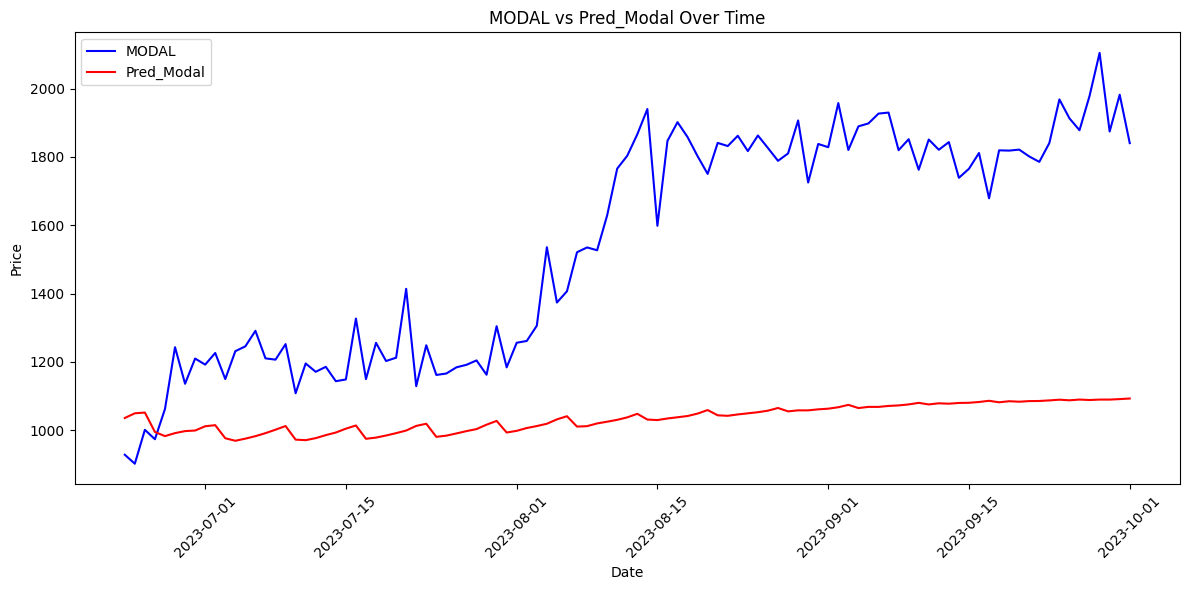

590.7405572713365


In [996]:
#fit model
model.fit(generatorTrain, epochs=4)

test_predictions = []

first_eval_batch = train_transformed[-n_input:]
current_batch = first_eval_batch.reshape((1, n_input, n_features))

for i in range(len(test)):
    
    # get the prediction value for the first batch
    current_pred = model.predict(current_batch)[0]
    
    # append the prediction into the array
    test_predictions.append(current_pred) 
    
    # use the prediction to update the batch and remove the first value
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

true_predictions = scaler.inverse_transform(test_predictions)

import pandas as pd

# Assuming 'true_predictions' is your array
test['Pred_Min'] = true_predictions[:, 0]
test['Pred_Max'] = true_predictions[:, 1]
test['Pred_Modal'] = true_predictions[:, 2]
test['Pred_Arrival'] = true_predictions[:, 3]

import matplotlib.pyplot as plt

# Assuming you have already set the date as the index
plt.figure(figsize=(12, 6))  # Adjust the figure size as needed
plt.plot(test.index, test['MODAL'], label='MODAL', color='blue', linestyle='-')
plt.plot(test.index, test['Pred_Modal'], label='Pred_Modal', color='red', linestyle='-')

# Customize the chart
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('MODAL vs Pred_Modal Over Time')
plt.legend()  # Add a legend to differentiate the two lines

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the chart
plt.tight_layout()
plt.show()

from sklearn.metrics import mean_squared_error
from math import sqrt
rmse=sqrt(mean_squared_error(test['MODAL'],test['Pred_Modal']))
print(rmse)

# Loop

Epoch 1/6
888/888 [==============================] - 7s 8ms/step - loss: 0.0015
Epoch 2/6
888/888 [==============================] - 6s 6ms/step - loss: 0.0015
Epoch 3/6
888/888 [==============================] - 6s 7ms/step - loss: 0.0014
Epoch 4/6
888/888 [==============================] - 6s 6ms/step - loss: 0.0015
Epoch 5/6
888/888 [==============================] - 7s 7ms/step - loss: 0.0015
Epoch 6/6
1/1 [==============================] - 0s 27ms/step


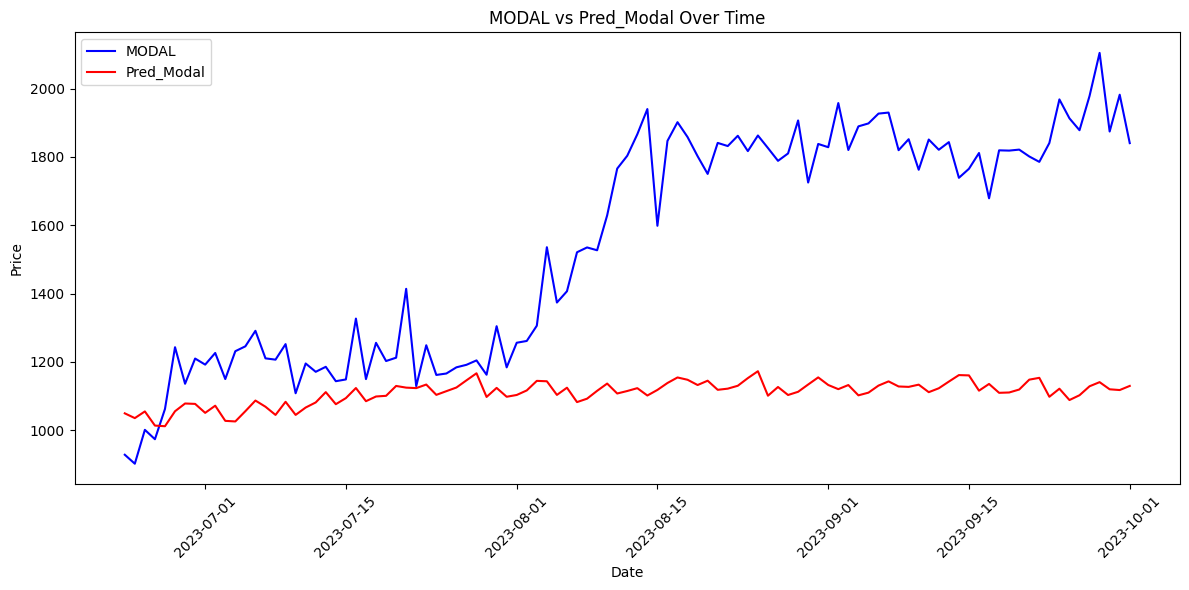

Current RMSE: 534.5004671565321
Epoch 1/6
888/888 [==============================] - 6s 7ms/step - loss: 0.0014
Epoch 2/6
888/888 [==============================] - 6s 6ms/step - loss: 0.0015
Epoch 3/6
888/888 [==============================] - 6s 7ms/step - loss: 0.0013
Epoch 4/6
888/888 [==============================] - 8s 9ms/step - loss: 0.0014
Epoch 5/6
888/888 [==============================] - 6s 7ms/step - loss: 0.0014
Epoch 6/6
1/1 [==============================] - 0s 50ms/step


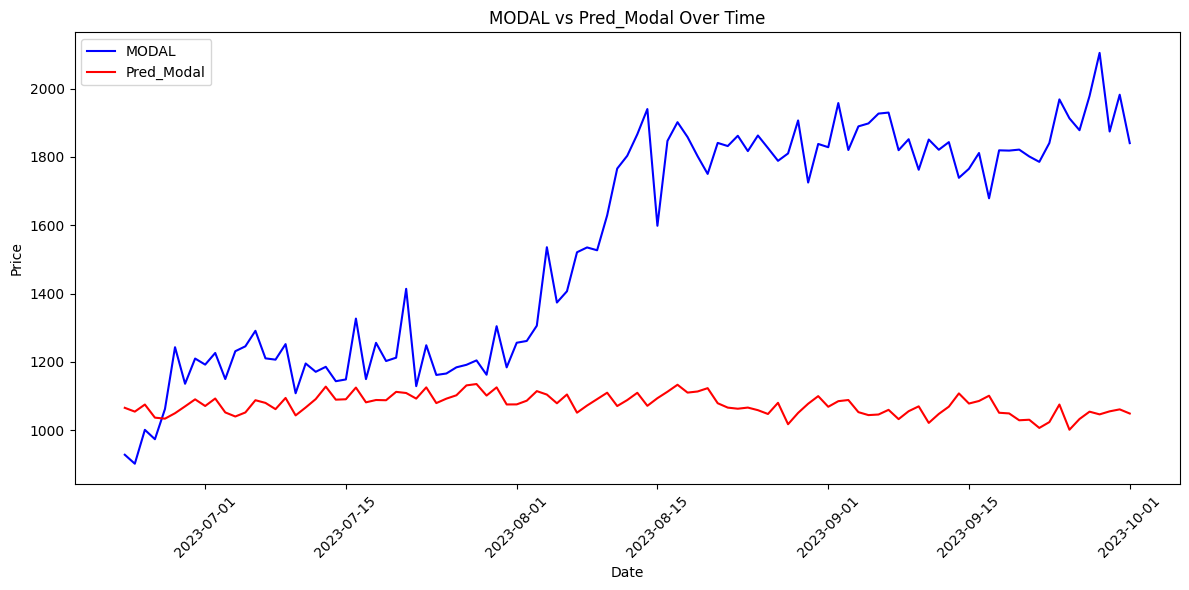

Current RMSE: 579.2014892150843
Epoch 1/6
888/888 [==============================] - 6s 7ms/step - loss: 0.0013
Epoch 2/6
888/888 [==============================] - 6s 6ms/step - loss: 0.0013
Epoch 3/6
888/888 [==============================] - 5s 6ms/step - loss: 0.0013
Epoch 4/6
888/888 [==============================] - 5s 6ms/step - loss: 0.0013
Epoch 5/6
888/888 [==============================] - 8s 9ms/step - loss: 0.0013
Epoch 6/6
1/1 [==============================] - 0s 20ms/step


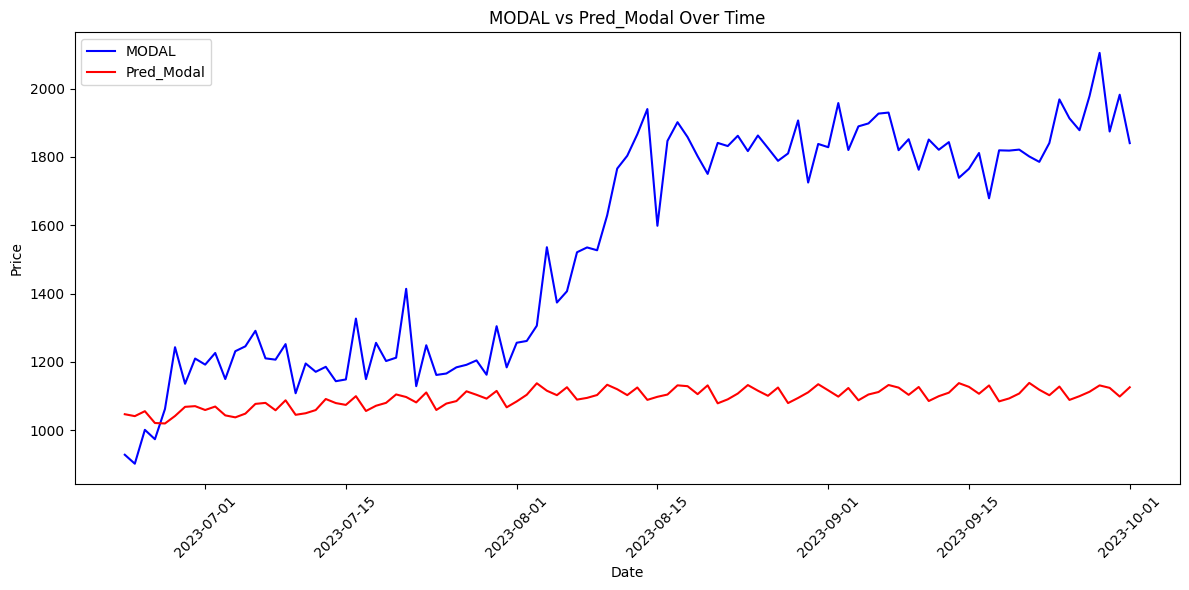

Current RMSE: 546.6262801628225
Epoch 1/6
888/888 [==============================] - 6s 6ms/step - loss: 0.0013
Epoch 2/6
888/888 [==============================] - 5s 6ms/step - loss: 0.0011
Epoch 3/6
888/888 [==============================] - 5s 6ms/step - loss: 0.0012
Epoch 4/6
888/888 [==============================] - 6s 6ms/step - loss: 0.0013
Epoch 5/6
888/888 [==============================] - 5s 6ms/step - loss: 0.0012
Epoch 6/6
1/1 [==============================] - 0s 33ms/step


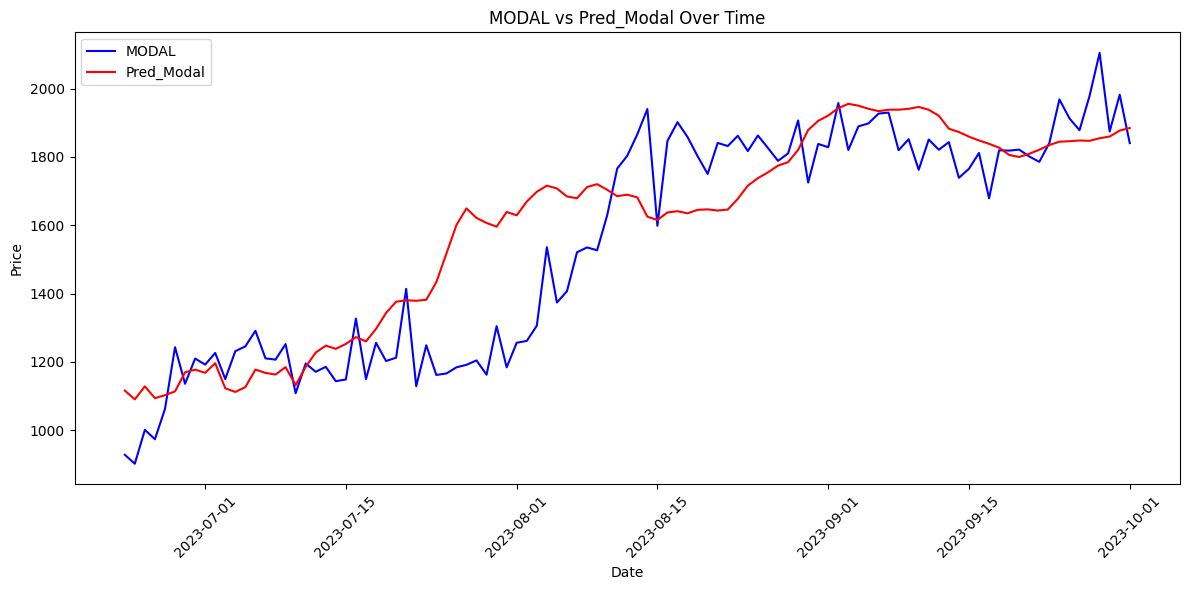

Current RMSE: 177.09473699973682
Target RMSE of 150 achieved.


In [998]:
target_rmse = 200
current_rmse = float('inf')  # Initialize RMSE with a large value

while current_rmse > target_rmse:
    #fit model
    model.fit(generatorTrain, epochs=6)

    test_predictions = []

    first_eval_batch = train_transformed[-n_input:]
    current_batch = first_eval_batch.reshape((1, n_input, n_features))

    for i in range(len(test)):
        # get the prediction value for the first batch
        current_pred = model.predict(current_batch)[0]

        # append the prediction into the array
        test_predictions.append(current_pred) 

        # use the prediction to update the batch and remove the first value
        current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

    true_predictions = scaler.inverse_transform(test_predictions)

    import pandas as pd

    # Assuming 'true_predictions' is your array
    test['Pred_Min'] = true_predictions[:, 0]
    test['Pred_Max'] = true_predictions[:, 1]
    test['Pred_Modal'] = true_predictions[:, 2]
    test['Pred_Arrival'] = true_predictions[:, 3]

    import matplotlib.pyplot as plt

    # Assuming you have already set the date as the index
    plt.figure(figsize=(12, 6))  # Adjust the figure size as needed
    plt.plot(test.index, test['MODAL'], label='MODAL', color='blue', linestyle='-')
    plt.plot(test.index, test['Pred_Modal'], label='Pred_Modal', color='red', linestyle='-')

    # Customize the chart
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.title('MODAL vs Pred_Modal Over Time')
    plt.legend()  # Add a legend to differentiate the two lines

    # Rotate x-axis labels for better readability
    plt.xticks(rotation=45)

    # Show the chart
    plt.tight_layout()
    plt.show()

    from sklearn.metrics import mean_squared_error
    from math import sqrt
    current_rmse = sqrt(mean_squared_error(test['MODAL'], test['Pred_Modal']))
    print("Current RMSE:", current_rmse)

print("Target RMSE of 150 achieved.")


# Forecast

In [999]:
import numpy as np

# Define the number of future days to forecast
n_forecast = 30

# Initialize an empty list to store the forecasted values
forecasted_prices = []

# Create an initial batch for prediction using the last n_input values from your test data
current_batch = test['MODAL'].values[-n_input:].reshape((1, n_input, 1))

# Loop to make predictions for the next n_forecast days
for _ in range(n_forecast):
    # Predict the MODAL price for the next day
    current_pred = model.predict(current_batch)[0][0]
    
    # Append the prediction to the list of forecasted prices
    forecasted_prices.append(current_pred)
    
    # Update the batch with the new prediction and remove the first value
    current_batch = np.append(current_batch[:, 1:, :], [[current_pred]], axis=1)

# You now have the forecasted prices for the next 30 days in the 'forecasted_prices' list


InvalidArgumentError: Graph execution error:

Detected at node sequential_51/lstm_51/while/lstm_cell/MatMul defined at (most recent call last):
  File "d:\Softwares\Python\Python39\lib\runpy.py", line 197, in _run_module_as_main

  File "d:\Softwares\Python\Python39\lib\runpy.py", line 87, in _run_code

  File "C:\Users\imaja\AppData\Roaming\Python\Python39\site-packages\ipykernel_launcher.py", line 17, in <module>

  File "C:\Users\imaja\AppData\Roaming\Python\Python39\site-packages\traitlets\config\application.py", line 1043, in launch_instance

  File "C:\Users\imaja\AppData\Roaming\Python\Python39\site-packages\ipykernel\kernelapp.py", line 736, in start

  File "C:\Users\imaja\AppData\Roaming\Python\Python39\site-packages\tornado\platform\asyncio.py", line 195, in start

  File "d:\Softwares\Python\Python39\lib\asyncio\base_events.py", line 596, in run_forever

  File "d:\Softwares\Python\Python39\lib\asyncio\base_events.py", line 1890, in _run_once

  File "d:\Softwares\Python\Python39\lib\asyncio\events.py", line 80, in _run

  File "C:\Users\imaja\AppData\Roaming\Python\Python39\site-packages\ipykernel\kernelbase.py", line 516, in dispatch_queue

  File "C:\Users\imaja\AppData\Roaming\Python\Python39\site-packages\ipykernel\kernelbase.py", line 505, in process_one

  File "C:\Users\imaja\AppData\Roaming\Python\Python39\site-packages\ipykernel\kernelbase.py", line 412, in dispatch_shell

  File "C:\Users\imaja\AppData\Roaming\Python\Python39\site-packages\ipykernel\kernelbase.py", line 740, in execute_request

  File "C:\Users\imaja\AppData\Roaming\Python\Python39\site-packages\ipykernel\ipkernel.py", line 422, in do_execute

  File "C:\Users\imaja\AppData\Roaming\Python\Python39\site-packages\ipykernel\zmqshell.py", line 546, in run_cell

  File "C:\Users\imaja\AppData\Roaming\Python\Python39\site-packages\IPython\core\interactiveshell.py", line 3009, in run_cell

  File "C:\Users\imaja\AppData\Roaming\Python\Python39\site-packages\IPython\core\interactiveshell.py", line 3064, in _run_cell

  File "C:\Users\imaja\AppData\Roaming\Python\Python39\site-packages\IPython\core\async_helpers.py", line 129, in _pseudo_sync_runner

  File "C:\Users\imaja\AppData\Roaming\Python\Python39\site-packages\IPython\core\interactiveshell.py", line 3269, in run_cell_async

  File "C:\Users\imaja\AppData\Roaming\Python\Python39\site-packages\IPython\core\interactiveshell.py", line 3448, in run_ast_nodes

  File "C:\Users\imaja\AppData\Roaming\Python\Python39\site-packages\IPython\core\interactiveshell.py", line 3508, in run_code

  File "C:\Users\imaja\AppData\Local\Temp\ipykernel_24812\3773697918.py", line 15, in <module>

  File "d:\Softwares\Python\Python39\lib\site-packages\keras\src\utils\traceback_utils.py", line 65, in error_handler

  File "d:\Softwares\Python\Python39\lib\site-packages\keras\src\engine\training.py", line 2631, in predict

  File "d:\Softwares\Python\Python39\lib\site-packages\keras\src\engine\training.py", line 2416, in predict_function

  File "d:\Softwares\Python\Python39\lib\site-packages\keras\src\engine\training.py", line 2401, in step_function

  File "d:\Softwares\Python\Python39\lib\site-packages\keras\src\engine\training.py", line 2389, in run_step

  File "d:\Softwares\Python\Python39\lib\site-packages\keras\src\engine\training.py", line 2357, in predict_step

  File "d:\Softwares\Python\Python39\lib\site-packages\keras\src\utils\traceback_utils.py", line 65, in error_handler

  File "d:\Softwares\Python\Python39\lib\site-packages\keras\src\engine\training.py", line 589, in __call__

  File "d:\Softwares\Python\Python39\lib\site-packages\keras\src\utils\traceback_utils.py", line 65, in error_handler

  File "d:\Softwares\Python\Python39\lib\site-packages\keras\src\engine\base_layer.py", line 1149, in __call__

  File "d:\Softwares\Python\Python39\lib\site-packages\keras\src\utils\traceback_utils.py", line 96, in error_handler

  File "d:\Softwares\Python\Python39\lib\site-packages\keras\src\engine\sequential.py", line 398, in call

  File "d:\Softwares\Python\Python39\lib\site-packages\keras\src\engine\functional.py", line 515, in call

  File "d:\Softwares\Python\Python39\lib\site-packages\keras\src\engine\functional.py", line 672, in _run_internal_graph

  File "d:\Softwares\Python\Python39\lib\site-packages\keras\src\layers\rnn\base_rnn.py", line 556, in __call__

  File "d:\Softwares\Python\Python39\lib\site-packages\keras\src\utils\traceback_utils.py", line 65, in error_handler

  File "d:\Softwares\Python\Python39\lib\site-packages\keras\src\engine\base_layer.py", line 1149, in __call__

  File "d:\Softwares\Python\Python39\lib\site-packages\keras\src\utils\traceback_utils.py", line 96, in error_handler

  File "d:\Softwares\Python\Python39\lib\site-packages\keras\src\layers\rnn\lstm.py", line 626, in call

  File "d:\Softwares\Python\Python39\lib\site-packages\keras\src\backend.py", line 5170, in rnn

  File "d:\Softwares\Python\Python39\lib\site-packages\keras\src\backend.py", line 5149, in _step

  File "d:\Softwares\Python\Python39\lib\site-packages\keras\src\layers\rnn\lstm.py", line 624, in step

  File "d:\Softwares\Python\Python39\lib\site-packages\keras\src\utils\traceback_utils.py", line 65, in error_handler

  File "d:\Softwares\Python\Python39\lib\site-packages\keras\src\engine\base_layer.py", line 1149, in __call__

  File "d:\Softwares\Python\Python39\lib\site-packages\keras\src\utils\traceback_utils.py", line 96, in error_handler

  File "d:\Softwares\Python\Python39\lib\site-packages\keras\src\layers\rnn\lstm.py", line 327, in call

  File "d:\Softwares\Python\Python39\lib\site-packages\keras\src\backend.py", line 2465, in dot

Matrix size-incompatible: In[0]: [1,1], In[1]: [4,544]
	 [[{{node sequential_51/lstm_51/while/lstm_cell/MatMul}}]] [Op:__inference_predict_function_3139034]

In [1002]:
import numpy as np

# Define the number of days to forecast
forecast_days = 90

# Initialize an empty array to store forecasted prices
forecasted_prices = []

# Get the last n_input days from your test data as the initial input
current_batch = test_transformed[-n_input:].reshape((1, n_input, n_features))

# Make predictions for the next 30 days
for _ in range(forecast_days):
    # Predict the next day's prices
    current_pred = model.predict(current_batch)[0]
    
    # Append the prediction to the forecasted_prices array
    forecasted_prices.append(current_pred)
    
    # Update the current_batch with the predicted values
    current_batch = np.append(current_batch[:, 1:, :], [[current_pred]], axis=1)

# Inverse transform the forecasted prices to get the actual values
forecasted_prices = scaler.inverse_transform(forecasted_prices)

# Create a date range for the next 30 days
from datetime import timedelta
last_date = test.index[-1]
forecast_dates = [last_date + timedelta(days=i) for i in range(1, forecast_days+1)]

# Create a DataFrame to store the forecasted prices
forecast_df = pd.DataFrame({
    'Date': forecast_dates,
    'Forecasted_Modal_Price': forecasted_prices[:, 2]  # Assuming the third column is MODAL Price
})

# Print or use forecast_df as needed
print(forecast_df)

1/1 [==============================] - 0s 21ms/step
         Date  Forecasted_Modal_Price
0  2023-10-02             1629.866623
1  2023-10-03             1684.232877
2  2023-10-04             1659.494733
3  2023-10-05             1675.772790
4  2023-10-06             1739.196253
..        ...                     ...
85 2023-12-26             1769.864634
86 2023-12-27             1747.515407
87 2023-12-28             1730.088818
88 2023-12-29             1724.420244
89 2023-12-30             1730.303693

[90 rows x 2 columns]


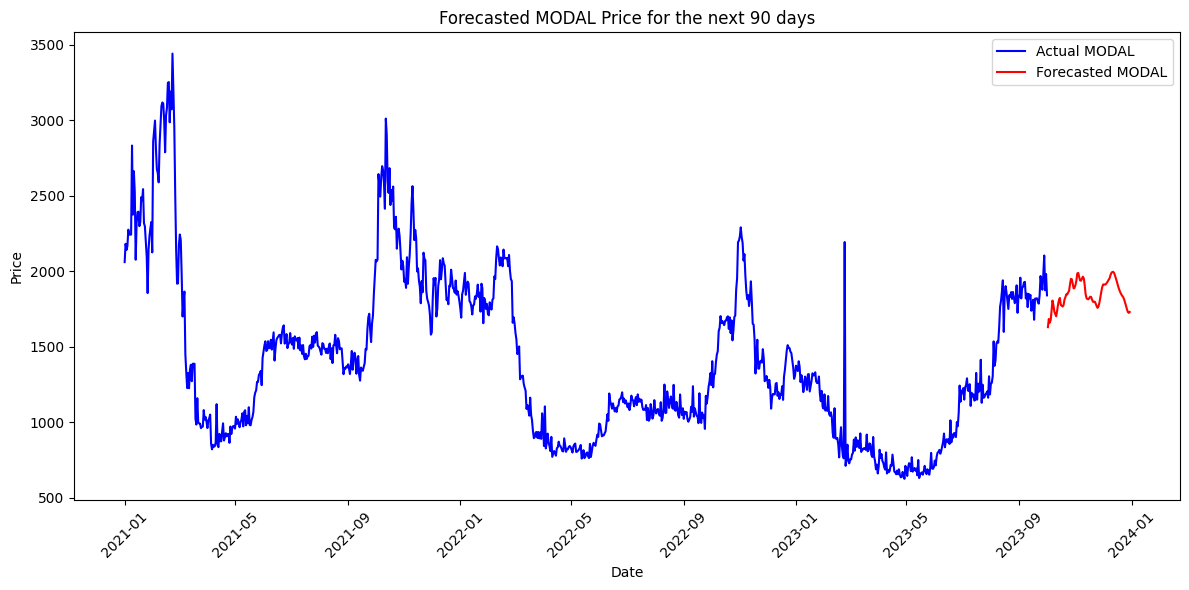

In [1006]:
import matplotlib.pyplot as plt

# Combine the train, test, and forecasted data for plotting
combined_data = pd.concat([train, test, forecast_df.set_index('Date')], axis=0)

# Plot the MODAL prices
plt.figure(figsize=(12, 6))
plt.plot(combined_data.index, combined_data['MODAL'], label='Actual MODAL', color='blue', linestyle='-')
plt.plot(forecast_df['Date'], forecast_df['Forecasted_Modal_Price'], label='Forecasted MODAL', color='red', linestyle='-')

# Customize the chart
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Forecasted MODAL Price for the next 90 days')
plt.legend()

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the chart
plt.tight_layout()
plt.show()

In [1005]:
with pd.option_context("display.max_columns", None, "display.max_rows", None):
    display(forecast_df)

,Date,Forecasted_Modal_Price
0,2023-10-02,1629.866623
1,2023-10-03,1684.232877
2,2023-10-04,1659.494733
3,2023-10-05,1675.772790
4,2023-10-06,1739.196253
5,2023-10-07,1806.113031
6,2023-10-08,1776.142654
7,2023-10-09,1732.855971
8,2023-10-10,1716.783474
9,2023-10-11,1702.077824
